In [1]:
import json

f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 6.415049231351906, 'sigma': 0.7814640506849777}, {'strat': 'Researchers and companies', 'mu': 5.763494090494625, 'sigma': 0.7799620626780065}, {'strat': 'People', 'mu': 5.056768383571668, 'sigma': 0.7822047714900999}]


In [4]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [6]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  6.137380
1       01. Governments  6.556076
2       01. Governments  5.721565
3       01. Governments  6.943830
4       01. Governments  5.941470
5       01. Governments  5.873128
6       01. Governments  6.269860
7       01. Governments  6.293632
8       01. Governments  6.323337
9       01. Governments  8.301288
10      01. Governments  5.571477
11      01. Governments  6.818180
12      01. Governments  7.907982
13      01. Governments  5.434536
14      01. Governments  6.290208
15      01. Governments  5.412207
16      01. Governments  7.403943
17      01. Governments  4.797891
18      01. Governments  6.234033
19      01. Governments  5.961417
20      01. Governments  6.704565
21      01. Governments  5.847474
22      01. Governments  5.594069
23      01. Governments  6.747806
24      01. Governments  6.170089
25      01. Governments  6.287318
26      01. Governments  6.409369
27      01. Governments  6.704454
28      01. Go

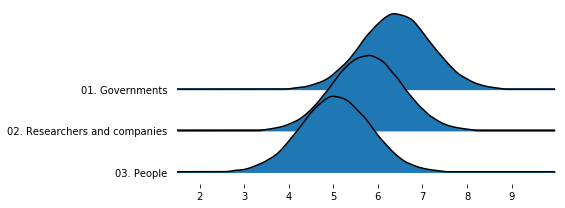

In [14]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))